# Portfolio Optimization and Algorithmic Trading

In [1]:
! pip install pandas_datareader

zsh:1: command not found: pip


In [ ]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import logging
import numpy as np
%matplotlib inline
logger = logging.getLogger(__name__)

## Helper functions

In [ ]:
def read_stock_data_to_df(stock_name, start = None):
  #Read Stock Data from Yahoo Finance
  end = dt.datetime.now()
  logger.info(f"today is {end}")
  if not start:
    start = dt.datetime(end.year-2, end.month, end.day)
  df = web.DataReader(stock_name, 'yahoo', start, end)
  df.to_csv(stock_name + '.csv')
  df = pd.read_csv(stock_name + '.csv')
  return df

def draw_regular_plot(df, stock_name=None):
  top = plt.subplot2grid((12,9), (0, 0), rowspan=10, colspan=9)
  bottom = plt.subplot2grid((12,9), (10,0), rowspan=2, colspan=9)
  top.plot(df.index, df['Adj Close'], color='blue') #df.index gives the dates
  bottom.bar(df.index, df['Volume'])
  # set the labels
  top.axes.get_xaxis().set_visible(False)
  if stock_name:
    top.set_title(stock_name)
  top.set_ylabel('Adj Close')
  bottom.set_ylabel('Volume')

def draw_density_plot(df, param = {})
  plt.figure(figsize=(12,9))
  ax = sns.distplot(df['Adj Close'].dropna(), bins=50, color='purple', vertical=True)
  rmin = min(df['Adj Close']) * 0.9
  rmax = max(df['Adj Close']) * 1.1
  step = param.get("step", 5)
  plt.yticks(np.arange(rmin, rmax, step))


## Stock data trend review

In [ ]:
stock_name = "MSFT"
df = read_stock_data_to_df(stock_name)
print(df.describe())

             High         Low        Open       Close        Volume   Adj Close
count  504.000000  504.000000  504.000000  504.000000  5.040000e+02  504.000000
mean   165.808750  162.259683  164.069127  164.134206  3.100896e+07  162.615415
std     37.134153   36.011805   36.586433   36.565162  1.469362e+07   37.284673
min    104.099998  102.169998  102.870003  102.779999  8.989200e+06  100.220734
25%    136.957500  134.992500  136.382500  136.070000  2.160425e+07  134.115185
50%    157.945000  154.314995  156.110001  157.410004  2.704260e+07  155.759949
75%    205.352501  201.399998  203.680000  203.237503  3.508750e+07  202.407394
max    232.860001  227.350006  229.270004  231.649994  9.707360e+07  231.045105


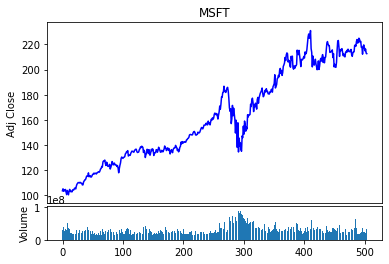

In [ ]:
draw_regular_plot(df, stock_name)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


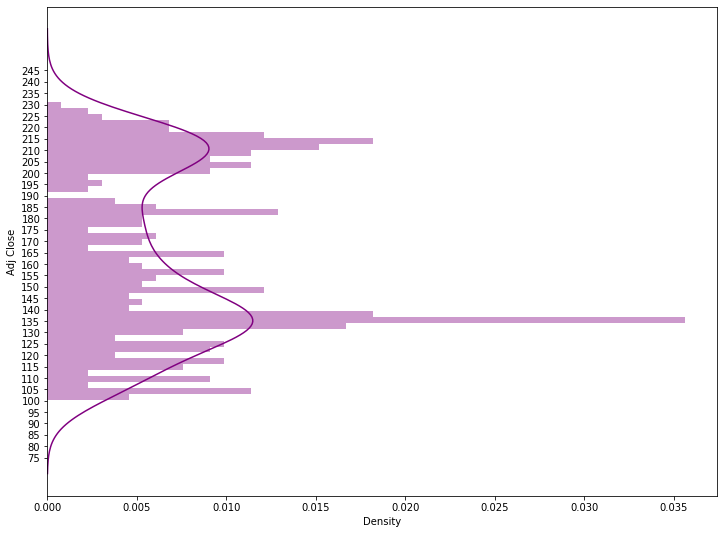

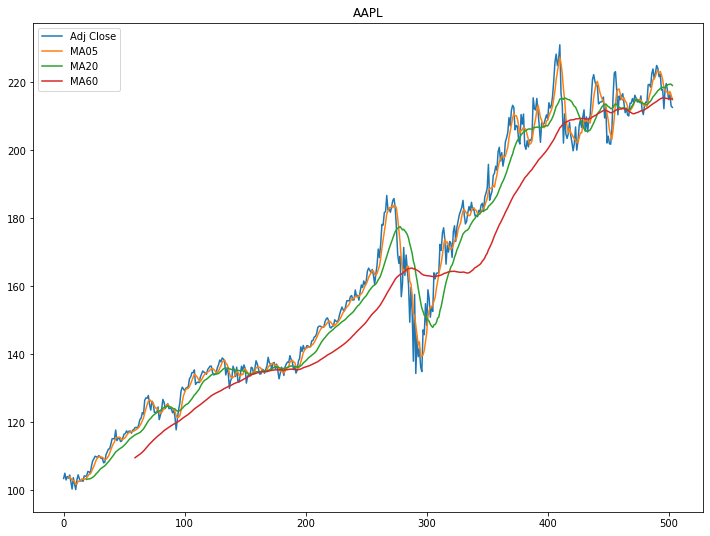

           Date        High         Low  ...        MA05        MA20        MA60
499  2021-01-11  218.910004  216.729996  ...  217.109998  219.281499  215.252115
500  2021-01-12  217.100006  213.320007  ...  216.515997  219.364999  215.182841
501  2021-01-13  216.759995  213.929993  ...  217.333997  219.471999  215.137067
502  2021-01-14  217.460007  212.740005  ...  216.279999  219.416499  215.126390
503  2021-01-15  214.509995  212.029999  ...  214.885999  219.084998  215.102398

[5 rows x 10 columns]


In [ ]:
plt.figure(figsize=(12,9))
ax = sns.distplot(df['Adj Close'].dropna(), bins=50, color='purple', vertical=True)
plt.yticks(np.arange(75, 250, 5))


# simple moving averages
df['MA05'] = df['Adj Close'].rolling(5).mean() #5 days
df['MA20'] = df['Adj Close'].rolling(20).mean() #20 days
df['MA60'] = df['Adj Close'].rolling(60).mean() #60 days
df2 = pd.DataFrame({'Adj Close': df['Adj Close'],'MA05': df['MA05'],'MA20': df['MA20'], 'MA60': df['MA60']})
df2.plot(figsize=(12, 9), legend=True, title='AAPL')
df2.to_csv('AAPL_MA.csv')
fig = plt.gcf()
fig.set_size_inches(12, 9)
fig.savefig('AAPL_plot.png', dpi=300)
plt.show()
print(df.tail())